<a href="https://colab.research.google.com/github/JCaballerot/Deep_learning_program/blob/main/Deep_learning_program/Modulo_II/Lab_Entendiendo_las_Convoluciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<h1 align="center"><font size="5">Entendiendo las Convoluciones</font></h1>



<h2>Introducción</h2>

<h3>Objetivo</h3>
En este laboratorio, aprenderemos más sobre los conceptos clave detrás de las CNN (Redes neuronales convolucionales de ahora en adelante).
Esta lección no pretende ser una referencia para <b> aprendizaje automático, aprendizaje profundo, convoluciones </b> o <b> TensorFlow </b>. La intención es dar nociones al usuario sobre estos campos.


       
<h3> Requisitos previos: </h3>
Conocimientos básicos de álgebra lineal, Python, Neural Networks y TensorFlow.

----

<h2> Tabla de contenido </h2>

<div class = "alert alert-block alert-info" style = "margin-top: 20px">
<font size = "3"> <strong> Haga clic en los enlaces para ir a las siguientes secciones: </strong> </font>
<br>
<ol>
     <li> <a href="#ref1"> Analogías </a> </li>
     <li> <a href="#ref2"> Comprensión y codificación con Python </a> </li>
     <li> <a href="#ref3"> Codificación con TensorFlow </a> </li>
     <li> <a href="#ref4"> Convolución aplicada a las imágenes </a> </li>
     <li> <a href="#ref5"> Conclusión </a> </li>
</ol>
<p> </p>
</div>
<br>


<hr>

<a id="ref1"> </a>
<h2> Analogías </h2>

Hay varias formas de comprender las capas convolucionales sin utilizar un enfoque matemático. Vamos a explorar algunas de las ideas propuestas por la comunidad de Machine Learning.

<h3> Instancias de neuronas </h3>

Cuando comienzas a aprender un lenguaje de programación, una de las primeras fases de tu desarrollo es el aprendizaje y la aplicación de funciones. En lugar de reescribir fragmentos de código cada vez que lo haría, se alienta a un buen estudiante a codificar usando programación funcional, manteniendo el código organizado, claro y conciso.
Las CNN pueden considerarse como una simplificación de lo que realmente está sucediendo, un tipo especial de red neuronal que usa copias idénticas de la misma neurona. Estas copias incluyen los mismos parámetros (pesos y sesgos compartidos) y funciones de activación.

<h3> Ubicación y tipo de conexiones </h3>

En una Red Neuronal con capas completamente conectadas, cada neurona de la capa actual está conectada a cada neurona de la capa anterior y cada conexión tiene su propio peso. Este es un patrón de conexión de propósito general y no hace suposiciones sobre las características en los datos de entrada, por lo que no se aprovecha ninguna ventaja que pueda aportar el conocimiento de los datos que se están utilizando. Este tipo de capas también son muy caras en términos de memoria y cálculo.

Por el contrario, en una capa convolucional, cada neurona solo está conectada a unas pocas neuronas locales cercanas en la capa anterior, y se usa el mismo conjunto de pesos para conectarse a ellas. Por ejemplo, en la siguiente imagen, las neuronas de la capa h1 están conectadas solo a algunas unidades de entrada (píxeles).
      
<img src="https://ibm.box.com/shared/static/mev168hepixnmc9zhh4hsr3t2ks3rpcc.png" alt="HTML5 Icon" style="width: 500px; height: 500px;">
<center> Una figura presentada en uno de los artículos de Yann LeCun. Muestra la relación espacial y cómo se modifican las conexiones hasta la capa de salida <a href="http://yann.lecun.com/exdb/publis/pdf/lecun-89e.pdf">ref</a></center> 


      
 



<h2> Feature Learning </h2>

El Feature engineering es el proceso de extraer patrones útiles de los datos de entrada que ayudarán al modelo de predicción a comprender mejor la naturaleza real del problema. Un buen feature learning presentará patrones de una manera que aumentará significativamente la precisión y el rendimiento de los algoritmos de machine learning aplicados de una manera que de otro modo sería imposible o demasiado costoso solo con el aprendizaje automático.

Los algoritmos de Feature learning encuentran los patrones comunes que son importantes para distinguir entre las clases deseadas y extraerlas automáticamente. Después de este proceso, están listos para usarse en un problema de clasificación o regresión.

La gran ventaja de las CNN es que son extraordinariamente buenas para encontrar características en imágenes que crecen después de cada nivel, lo que al final da como resultado características de alto nivel. Las capas finales (pueden ser una o más) utilizan todas estas características generadas para clasificación o regresión.

Básicamente, las redes neuronales convolucionales son su mejor amigo para <b> realizar automáticamente la ingeniería de características </b> (aprendizaje de características) sin perder demasiado tiempo creando sus propios códigos y sin necesidad previa de experiencia en el campo de Feature Engineering.
<br>

<img src="https://ibm.box.com/shared/static/urzzkc7o5loqrlezcvn4kr594mxi9ftx.png" alt="HTML5 Icon" style="width: 650px; height: 250px;">
<center> 
    Ejemplo de feature learning (feature learning automático), comenzando con características simples y terminando con características de alto nivel como rostros humanos. <a href="https://devblogs.nvidia.com/parallelforall/deep-learning-nutshell-core-concepts/">ref</a> 
</center> 


<h3> Filtro de imagen </h3>

<b> ¿Cómo crear una convolución a partir de una imagen? </b>
La siguiente imagen es una matriz de 8x8 de los píxeles de una imagen, convertida a valores binarios en la siguiente imagen (izquierda), donde 1 significa un píxel blanco y 0 un píxel negro. Más adelante descubriremos que normalmente se trata de una normalización, estos valores pueden tener diferentes escalas. El uso más común son los valores entre 0 y 255 para imágenes en escala de grises de 8 bits.

<img src="https://ibm.box.com/shared/static/0s5v7doe2p5xuzifs47bxmmuwrn3kra2.bmp" alt="HTML5 Icon" style="width: 200px; height: 200px;">
<center> Un ejemplo de una imagen de baja resolución para ser reconocida.


En la imagen de abajo, con una animación, puede ver cómo operaría la operación de convolución bidimensional en las imágenes. Esta operación se realiza en la mayoría de los frameworks de Deep Learning en su primera fase. Necesitamos ventanas deslizantes para crear la matriz convolucionada:

$
kernel=
\begin{bmatrix}
     1          & 0      & 1     \\
     0          & 1    & 0     \\
     1          & 0    & 1
\end{bmatrix}
\\
$ 



La ventana deslizante (también conocida como kernel, filtro o detector de características) con un cálculo predeterminado ([[x1, x0, x1], [x0, x1, x0], [x1, x0, x1]]) recorre la imagen y crea un nueva matriz (mapa de características).

 <img src="https://ibm.box.com/shared/static/fvutcm8jwa5j2o7xv2zzqyz2yu3zwhz4.gif" alt="HTML5 Icon" style="width: 450px; height: 300px;">
<center>  Las Animaciones muestran cómo interactúa un kernel con una matriz que representa una imagen. <a href="http://cs231n.github.io/convolutional-networks/">ref</a></center>  
 
 
En el ejemplo anterior usamos un filtro de 3 × 3 (también se podría usar 5x5, pero sería demasiado complejo). Los valores del filtro se multiplicaron por elementos con la matriz original (imagen de entrada) y luego se sumaron. Para obtener la matriz convolucionada completa, el algoritmo sigue repitiendo este pequeño procedimiento para cada elemento deslizando el filtro sobre toda la matriz original.

<img src="https://ibm.box.com/shared/static/7maczejdeej0qoz3pzkysw0y8qb70g2h.png" alt="HTML5 Icon" style="width: 500px; height: 200px;"> 
<center>  Ilustración de la operación para una posición del kernel. <a href="http://colah.github.io/posts/2014-07-Understanding-Convolutions/">ref</a></center>

Al igual que en el ejemplo al que se hace referencia, podemos pensar en una convolución unidimensional como una función deslizante (filtro 1x1 o 1x2) que se multiplica y suma en la parte superior de una matriz (matriz unidimensional, en lugar de la matriz original).
 
<b> ¿Cuál es el resultado de aplicar un kernel a una imagen? </b>
El famoso GIMP (Open Source Image Editor) tiene una explicación sobre la operación de convolución aplicada a las imágenes que puede ayudarnos a comprender cómo interactuarán las redes neuronales con esta herramienta.

<img src="https://ibm.box.com/shared/static/wixvbo9pk0f6r6ln879ah9jjo0ua0fo5.png" alt="HTML5 Icon" style="width: 700px; height: 350px;"> 
<center>   Aplicando el kernel izquierdo a la imagen resultará en un efecto de desenfoque. <a href="http://colah.github.io/posts/2014-07-Understanding-Convolutions/">ref</a> </center>


Bueno, esto es muy útil si desea efectos agradables para sus fotos de redes sociales, pero en el campo del computer vision necesita patrones detallados (recuerde el feature learning) que casi se borran con un kernel como ese. Un ejemplo más adecuado sería el Kernel / filter que muestra los bordes de las fotos (la primera característica reconocible de una imagen).


<b>Probemos con otro kernel:</b>

Tomando los valores -1 y 1 en dos píxeles adyacentes y cero en cualquier otro lugar del kernel, se obtiene la siguiente imagen. Es decir, restamos dos píxeles adyacentes. Cuando los píxeles uno al lado del otro son similares, esto nos da aproximadamente cero. En los bordes, sin embargo, los píxeles adyacentes son muy diferentes en la dirección perpendicular al borde. Sabiendo que los resultados difieren de cero dará como resultado píxeles más brillantes, ya puede adivinar el resultado de este tipo de kernel.

<img src="https://ibm.box.com/shared/static/z673yijcsfqs5rd8auc1dwmtkejyizv0.png" alt="HTML5 Icon" style="width:700px;height:350px;">
<center> La aplicación del nuevo kernel izquierdo a la imagen resultará en una detección de bordes, esta salida normalmente es útil para las capas iniciales de una CNN. <a href="http://colah.github.io/posts/2014-07-Understanding-Convolutions/">ref</a></center>

***


<a id="ref2"></a>
<h2>Comprendiendo y codificando con Python</h2>

<h3>Convolución: operación 1D con Python (Numpy / Scipy)</h3>

<h4>Notación matemática</h4>
En este primer ejemplo, usaremos la notación matemática pura. Aquí tenemos una operación de convolución unidimensional. Digamos que h es nuestra imagen y x es nuestro kernel:
  
x [i] = {3, 4, 5}
h [i] = {2, 1, 0}

donde i = índice

Para usar la operación de convolución entre las dos matrices, pruebe el siguiente código para ver qué tan fácil es hacerlo en Python.

In [ ]:
import numpy as np

h = [2, 1, 0]
x = [3, 4, 5]

y = np.convolve(x, h)
y  

array([ 6, 11, 14,  5,  0])

deslizando la ventana x sobre h:
<ul>
    <li>6  = 2 * 3 :            
        $
        \begin{bmatrix}
             3 & 4 & 5 \\
        \end{bmatrix}
        \\ 
        \begin{bmatrix}
             2 & 0 & 0 \\
        \end{bmatrix}
        $ 
    </li>
    <li>11 = 1 * 3 + 2 * 4 :
        $
        \begin{bmatrix}
             3 & 4 & 5 \\
        \end{bmatrix}
        \\
        \begin{bmatrix}
             1 & 2 & 0 \\
        \end{bmatrix}
        $ 
    </li>  
    <li>14 = 0 * 3 + 1 * 4 + 2 * 5 :
        $
        \begin{bmatrix}
             3 & 4 & 5 \\
        \end{bmatrix}
        \\
        \begin{bmatrix}
             0 & 1 & 2 \\
        \end{bmatrix}
        $ 
    </li>  
    <li>5  = 0 * 4 + 1 * 5 :
        $
        \begin{bmatrix}
             3 & 4 & 5 \\
        \end{bmatrix}
        \\
        \begin{bmatrix}
             0 & 0 & 1 \\
        \end{bmatrix}
        $ 
    </li>
    <li>0  = 0 * 5 :
        $
        \begin{bmatrix}
             3 & 4 & 5 \\
        \end{bmatrix}
        \\
        \begin{bmatrix}
             0 & 0 & 0 \\
        \end{bmatrix}
        $ 
    </li>
</ul>

<h4> Ahora vamos a verificar lo que hizo Python, porque no confiamos en los resultados de la computadora mientras aprendemos. Usando la ecuación de convolución para y[n]:</h4>
  
$$y[n] = \sum\limits_{k\to-\infty}^\infty x[k] \cdot h[n-k] $$


And then, manually executing computation:

$ 
y[0]= \sum\limits_{k\to-\infty}^\infty x[k]\cdot h[0-k]= x[0]\cdot h[0]=3\cdot 2=6 \\
y[1]= \sum\limits_{k\to-\infty}^\infty x[k]\cdot h[1-k]= x[0]\cdot h[1-0]+x[1]\cdot h[1-1] + \space... \\ 
\qquad\qquad\qquad\qquad\qquad   = x[0]\cdot h[1] + x[1]\cdot h[0]= 3\cdot1+4\cdot 2=11 \\
y[2]= \sum\limits_{k\to-\infty}^\infty x[k]\cdot h[2-k]= x[0]\cdot h[2-0]+x[1]\cdot h[2-1]+x[2]\cdot h[2-2]+ \space ... \\ 
\qquad\qquad\qquad\qquad\qquad   = x[0]\cdot h[2] + x[1]\cdot h[1]+x[2]\cdot h[0]= 3\cdot0+4\cdot 1 +5\cdot 2=14 \\
y[3]= \sum\limits_{k\to-\infty}^\infty x[k]\cdot h[3-k]= x[0]\cdot h[3-0]+x[1]\cdot h[3-1]+x[2]\cdot h[3-2]+ x[3]\cdot h[3-3] + \space... \\ 
\qquad\qquad\qquad\qquad\qquad   = x[0]\cdot h[3] +x[1]\cdot h[2] + x[2]\cdot h[1]+x[3]\cdot h[0]=0+0+5 \cdot 1 +0=5 \\
y[4]= \sum\limits_{k\to-\infty}^\infty x[k]\cdot h[4-k]= x[0]\cdot h[4-0]+x[1]\cdot h[4-1]+x[2]\cdot h[4-2]+\space... =0\\ 
$

In [ ]:
print("Compare con los siguientes valores de Python: y[0] = {0} ; y[1] = {1}; y[2] = {2}; y[3] = {3}; y[4] = {4}".format(y[0], y[1], y[2], y[3], y[4])) 

Hay tres métodos para aplicar el kernel en la matriz, <b> con padding (full) </b>, <b> con padding (same) </b> y <b> sin padding (valid) </b>:

</h3>1) Comprensión visual de la operación con padding (full)</h3>

Pensemos en el kernel como una ventana deslizante. Tenemos que llegar con la solución de rellenar ceros en la matriz de entrada. Esta es una implementación muy famosa y será más fácil mostrar cómo funciona con un ejemplo simple, considere este caso:
  
x[i] = [6,2]  
h[i] = [1,2,5,4]  

Usando el zero padding, podemos calcular la convolución.
 
Tienes que invertir el filtro x, de lo contrario la operación sería una correlación cruzada.
Primer paso, (ahora con relleno cero):

    [2  6]
     |  |
     V  V
     0 [1 2 5 4]

= 2 \* 0 + 6 * 1 = 6 
 
Segundo paso:

      [2  6]  
       |  |  
       V  V  
    0 [1  2  5  4]  

= 2 \* 1 + 6 * 2 = 14 (las flechas representan la conexión entre el kernel y la entrada)

Tercer paso:

         [2  6]  
          |  |  
          V  V  
    0 [1  2  5  4]  

= 2 \* 2 + 6 * 5 = 34  
  
Cuarto Paso:

            [2  6]
             |  |
             V  V
    0 [1  2  5  4]  

= 2 \* 5 + 6 * 4 = 34

Quinto Paso:

               [2  6]
                |  |
                V  V
    0 [1  2  5  4] 0  

= 2 \* 4 + 6 * 0 = 8
 
El resultado de la convolución para este caso, enumerando todos los pasos, sería entonces: Y = [6 14 34 34 8]

A continuación verificamos con numpy:

In [ ]:
import numpy as np

x = [6, 2]
h = [1, 2, 5, 4]

y = np.convolve(x, h, "full")  #ahora, debido al relleno de ceros, la dimensión final de la matriz es mayor
y  

array([ 6, 14, 34, 34,  8])

<h3>2) Entendiendo visualmente la operación "same"</h3>

En este enfoque, simplemente agregamos el cero a la izquierda (y la parte superior de la matriz en 2D). Es decir, solo los primeros 4 pasos del método "Full":

In [ ]:
import numpy as np

x = [6, 2]
h = [1, 2, 5, 4]

y = np.convolve(x, h, "same")  # es lo mismo que el zero padding, pero devuelve una salida con la misma longitud que el máximo de x ó h
y  

array([ 6, 14, 34, 34])

<h3>3) Entendiendo visualmente la operación sin padding (valid)</h3>

En el último caso, solo aplicamos el kernel cuando teníamos una posición compatible en la matriz h, en algunos casos desea una reducción de dimensionalidad. Para este propósito, simplemente ignoramos los pasos que necesitarían relleno:
    
x[i] = [6 2] 

h[i] = [1 2 5 4]

Tienes que invertir el filtro x, de lo contrario la operación sería una correlación cruzada.
Primer paso, (ahora sin zero padding):

    [2  6]  
     |  |  
     V  V  
    [1  2  5  4]  

= 2 \* 1 + 6 * 2 = 14 (las flechas representan la conexión entre el kernel y la entrada)

Segundo paso:

       [2  6]  
        |  |   
        V  V  
    [1  2  5  4]  

= 2 \* 2 + 6 * 5 = 34  
  
Tercer paso:

          [2  6]
           |  |
           V  V
    [1  2  5  4]  

= 2 \* 5 + 6 * 4 = 34

El resultado de la convolución para este modo sería Y = [14 34 34] = [Primer, segundo, tercer paso]

Let's verify with numpy

In [ ]:
import numpy as np

x = [6, 2]
h = [1, 2, 5, 4]

y = np.convolve(x, h, "valid")   # Valid retorna un output de longitud max (x, h) - min (x, h) + 1, esto es para asegurar que los valores fuera del límite de
                                 # h no se utilizará en el cálculo de la convolución
                                 # en el siguiente ejemplo entenderemos por qué usamos el argumento válido
y  

array([14, 34, 34])

<h3>Convolución: Operación 2D con Python (Numpy/Scipy)</h3>

La operación de convolución 2D se define como:

<font size="4">$$ I'= \sum\limits_{u,v} I(x-u,y-v)g(u,v) $$ </font> 
 
 
A continuación aplicaremos la ecuación a una imagen representada por una matriz de 3x3 según la función g = (-1 1). Tenga en cuenta que cuando aplicamos el kernel siempre usamos su inversión.
 
$
I=
\begin{bmatrix}
     255          & 7      & 3     \\
     212          & 240    & 4     \\
     218          & 216    & 230
\end{bmatrix}
\\
$ 

$
g=
\begin{bmatrix}
     -1          & 1      
\end{bmatrix}
\\
$ 
  
$
\begin{bmatrix}
    \textbf{1}\cdot \textbf{0}      & \textbf{-1} \ast \textbf{255}  & 7      & 3     \\
    0              & 212          & 240    & 4     \\
    0              & 218          & 216    & 230
\end{bmatrix}
\rightarrow
\begin{bmatrix}
    \textbf{-255}  & 7      & 3     \\
    212            & 240    & 4     \\
    218            & 216    & 230
\end{bmatrix}
\\
$

$
\begin{bmatrix}
    \textbf{1}\ast \textbf{255}      & \textbf{-1} \ast \textbf{7}  & 3    \\
    212          & 240    & 4     \\
    218          & 216    & 230
\end{bmatrix}
\rightarrow
\begin{bmatrix}
    -255           & \textbf{248}      & 3     \\
    212            & 240    & 4     \\
    218            & 216    & 230
\end{bmatrix}
\\
$

$
\begin{bmatrix}
    255          & \textbf{1}\ast\textbf{7}  & \textbf{-1}\ast\textbf{3}    \\
    212          & 240    & 4     \\
    218          & 216    & 230
\end{bmatrix}
\rightarrow
\begin{bmatrix}
    -255           & 248      & \textbf{4}     \\
    212            & 240      & 4     \\
    218            & 216      & 230
\end{bmatrix}
\\
$

  
$
\begin{bmatrix}
    0              & 255          & 7          & 3     \\
    \textbf{1}\ast \textbf{0}    & \textbf{-1} \ast \textbf{212}  & 240     & 4     \\
    0              & 218          & 216    & 230
\end{bmatrix}
\rightarrow
\begin{bmatrix}
    \textbf{-255}  & 248    & 4     \\
    -212            & 240    & 4     \\
    218            & 216    & 230
\end{bmatrix}
\\
$
 
 


No tenemos que terminar los cálculos, tenemos la computadora a nuestro lado. Entonces, veamos cuál es el código para proceder con esta operación:

In [ ]:
from scipy import signal as sg

I= [[255,   7,  3],
    [212, 240,  4],
    [218, 216, 230],]

g= [[-1, 1]]

print('Sin zero padding \n')
print('{0} \n'.format(sg.convolve( I, g, 'valid')))
# El argumento 'valid' establece que la salida consta solo de elementos
# que no se basan en zero-padding.

print('With zero padding \n')
print(sg.convolve( I, g))

Sin zero padding 

[[248   4]
 [-28 236]
 [  2 -14]] 

With zero padding 

[[-255  248    4    3]
 [-212  -28  236    4]
 [-218    2  -14  230]]


Para un caso más difícil donde h= [ [-1  1] , [2   3] ]

$
\begin{bmatrix}
    \textbf{3}\ast \textbf{0}      & \textbf{2} \ast \textbf{0}     & 0      & 0     \\
    \textbf{1}\ast \textbf{0}      & \textbf{-1} \ast \textbf{255}  & 7      & 3     \\
    0              & 212          & 240    & 4     \\
    0              & 218          & 216    & 230
\end{bmatrix}
\rightarrow
\begin{bmatrix}
    \textbf{-255}  & 7      & 3     \\
    212            & 240    & 4     \\
    218            & 216    & 230
\end{bmatrix}
\\
$

In [ ]:
from scipy import signal as sg

I= [[255,   7,  3],
    [212, 240,  4],
    [218, 216, 230],]

g= [[-1,  1],
    [ 2,  3],]

print ('With zero padding \n')
print ('{0} \n'.format(sg.convolve( I, g, 'full')))
# La salida es la convolución lineal discreta completa de las entradas.
# Utilizará cero para completar la matriz input

print ('With zero padding_same_ \n')
print ('{0} \n'.format(sg.convolve( I, g, 'same')))
# La salida es la convolución lineal discreta completa de las entradas.
# Utilizará cero para completar la matriz input


print ('Without zero padding \n')
print (sg.convolve( I, g, 'valid'))
# El argumento 'valid' establece que la salida consta solo de elementos
# que no se basan en zero-padding.

With zero padding 

[[-255  248    4    3]
 [ 298  751  263   13]
 [ 206 1118  714  242]
 [ 436 1086 1108  690]] 

With zero padding_same_ 

[[-255  248    4]
 [ 298  751  263]
 [ 206 1118  714]] 

Without zero padding 

[[ 751  263]
 [1118  714]]


----------------

<a id="ref3"></a>
<h2>Codificando con TensorFlow</h2>

Numpy es genial porque tiene operaciones matriciales altamente optimizadas implementadas en un backend usando C / C ++. Sin embargo, si nuestro objetivo es trabajar con DeepLearning, necesitamos mucho más. TensorFlow hace el mismo trabajo, pero en lugar de regresar a Python cada vez, crea todas las operaciones en forma de gráficos y las ejecuta una vez con el backend altamente optimizado.

Suponga que tiene dos tensores:

* Filtro 3x3 (tensor 4D = [3,3,1,1] = [ancho, alto, canales, número de filtros])
* Imagen de 10 x 10 (tensor 4D = [1,10,10,1] = [tamaño del lote, ancho, alto, número de canales]

El tamaño de salida para el modo de relleno cero 'SAME' será:
* lo mismo que input = 10x10

El tamaño de salida sin relleno de ceros en el modo 'VALID':
* tamaño de entrada - dimensión del kernel + 1 = 10-3 + 1 = 8 = 8x8

In [ ]:
import tensorflow as tf
print("using version " + tf.__version__)

input = tf.Variable(tf.random.normal([1, 10, 10, 1]))
filter = tf.Variable(tf.random.normal([3, 3, 1, 1]))
op = tf.nn.conv2d(input, filter, strides=[1, 1, 1, 1], padding='VALID')
op2 = tf.nn.conv2d(input, filter, strides=[1, 1, 1, 1], padding='SAME')

print("Input \n")
print('{0} \n'.format(input.numpy()))
print("Filter/Kernel \n")
print('{0} \n'.format(filter.numpy()))
print("Result/Feature Map con valid \n")
print(op.numpy())
print('\n')
print("Result/Feature Map con padding \n")
print(op2.numpy())

<hr>

<a id="ref4"></a>
<h2>Convolución aplicada a imágenes</h2>

Cargue su propia imagen (arrastre y suelte en esta ventana) y escriba su nombre en el campo de entrada en la siguiente celda (presione <b>shift + enter</b>). El resultado de este preprocesamiento será una imagen con solo un canal de escala de grises.

Puede escribir <b>bird.jpg</b> para usar una imagen predeterminada.

In [ ]:
# descargar una imagen estándar
!wget --quiet https://ibm.box.com/shared/static/cn7yt7z10j8rx6um1v9seagpgmzzxnlz.jpg --output-document bird.jpg    


 Original type: <PIL.Image.Image image mode=L size=275x183 at 0x7F1E22C7A1D0> 


After conversion to numerical representation: 

 array([[73, 74, 75, ..., 67, 66, 66],
       [73, 74, 75, ..., 59, 59, 58],
       [73, 73, 75, ..., 57, 57, 56],
       ...,
       [72, 37, 53, ..., 30, 43, 46],
       [72, 52, 46, ..., 12, 34, 30],
       [44, 59, 32, ..., 16, 46, 37]], dtype=uint8)

 Imagen input convertida a escala de grises: 



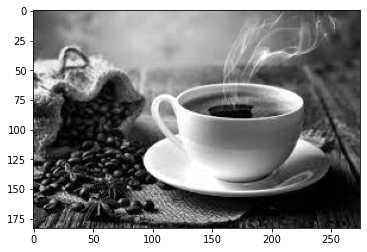

In [ ]:

#Importando
import numpy as np
from scipy import signal
from scipy import misc
import matplotlib.pyplot as plt
from PIL import Image

im = Image.open('bird.jpg')  # Escribe aquí el nombre de tu imagen

image_gr = im.convert("L")    # convert("L") convierte imagenes a blanco y negro 
                              # utiliza la transformada de Luma ITU-R 601-2 (hay varias
                              # formas de convertir una imagen a escala de grises)
print("\n Original type: %r \n\n" % image_gr)

# convertir imagen a una matriz con valores de 0 a 255 (uint8)
arr = np.asarray(image_gr) 
print("After conversion to numerical representation: \n\n %r" % arr) 
### Activando matplotlib para Ipython
%matplotlib inline

### Plot imagen

imgplot = plt.imshow(arr)
imgplot.set_cmap('gray')  # puedes experimentar con diferentes colormaps (Greys,winter,autumn)
print("\n Imagen input convertida a escala de grises: \n")
plt.show(imgplot)


Ahora, experimentaremos usando un kernel detector de bordes.

In [ ]:
kernel = np.array([[ 0, 1, 0],
                   [ 1,-4, 1],
                   [ 0, 1, 0],]) 

grad = signal.convolve2d(arr, kernel, mode='same', boundary='symm')

GRADIENT MAGNITUDE - Feature map


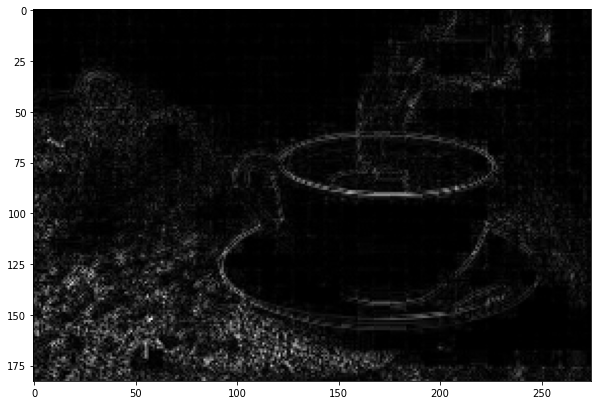

In [ ]:
%matplotlib inline

print('GRADIENT MAGNITUDE - Feature map')

fig, aux = plt.subplots(figsize=(10, 10))
aux.imshow(np.absolute(grad), cmap='gray')


Si cambiamos el kernel y comenzamos a analizar las salidas estaríamos actuando como una CNN. La diferencia es que una red neuronal hace todo este trabajo automáticamente (el ajuste del kernel utiliza diferentes pesos). Además, podemos comprender cómo los sesgos afectan el comportamiento de los feature maps.

<b> Tenga en cuenta que cuando se trata de la mayoría de las aplicaciones reales de CNN, normalmente se convierten los valores de los píxeles en un rango de 0 a 1. Este proceso se denomina normalización. </b>

In [ ]:
type(grad)

grad_biases = np.absolute(grad) + 100

grad_biases[grad_biases > 255] = 255


GRADIENT MAGNITUDE - Feature map


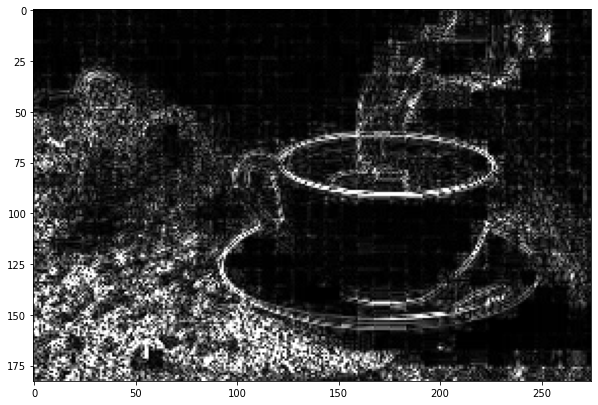

In [ ]:
%matplotlib inline

print('GRADIENT MAGNITUDE - Feature map')

fig, aux = plt.subplots(figsize=(10, 10))
aux.imshow(np.absolute(grad_biases), cmap='gray')

Veamos cómo funciona para un dígito:

In [ ]:
# Descargar una imagen estándar
!wget --quiet https://ibm.box.com/shared/static/vvm1b63uvuxq88vbw9znpwu5ol380mco.jpg --output-document num3.jpg    


 Original type: <PIL.Image.Image image mode=L size=181x181 at 0x7F1DE8506690> 


Después de la conversión a representación numérica: 

 array([[26, 14, 12, ..., 11, 11, 11],
       [ 0,  0,  1, ...,  0,  0,  0],
       [12,  1,  0, ...,  0,  0,  0],
       ...,
       [12,  0,  0, ...,  0,  0,  0],
       [12,  0,  0, ...,  0,  0,  0],
       [12,  0,  0, ...,  0,  0,  0]], dtype=uint8)

 Imagen input convertida a escala de grises: 



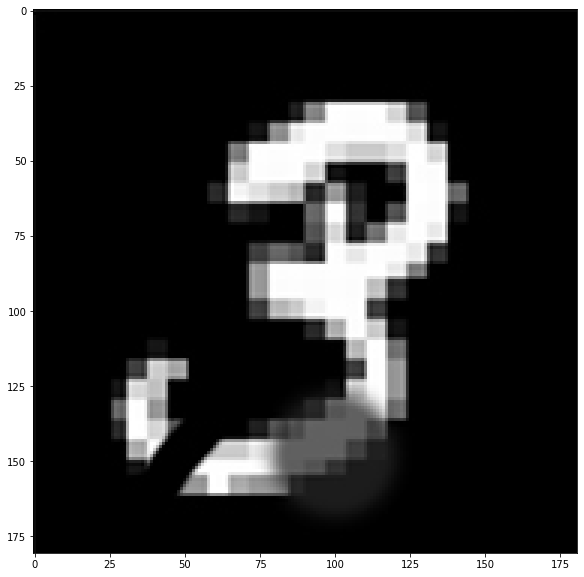

In [ ]:

#Importando
import numpy as np
from scipy import signal
from scipy import misc
import matplotlib.pyplot as plt
from PIL import Image

im = Image.open('num3.jpg')  # Escribe aquí el nombre de tu imagen

image_gr = im.convert("L")    # convert("L") convierte imagenes a blanco y negro 
                              # utiliza la transformada de Luma ITU-R 601-2 (hay varias
                              # formas de convertir una imagen a escala de grises)
print("\n Original type: %r \n\n" % image_gr)

# convertir imagen a una matriz con valores de 0 a 255 (uint8)
arr = np.asarray(image_gr) 
print("Después de la conversión a representación numérica: \n\n %r" % arr) 
### Activando matplotlib para Ipython
%matplotlib inline

### Plot imagen
fig, aux = plt.subplots(figsize=(10, 10))
imgplot = plt.imshow(arr)
imgplot.set_cmap('gray')  # puedes experimentar con diferentes colormaps (Greys,winter,autumn)
print("\n Imagen input convertida a escala de grises: \n")
plt.show(imgplot)

Ahora, vamos a experimentar con un kernel para detectar bordes.

GRADIENT MAGNITUDE - Feature map


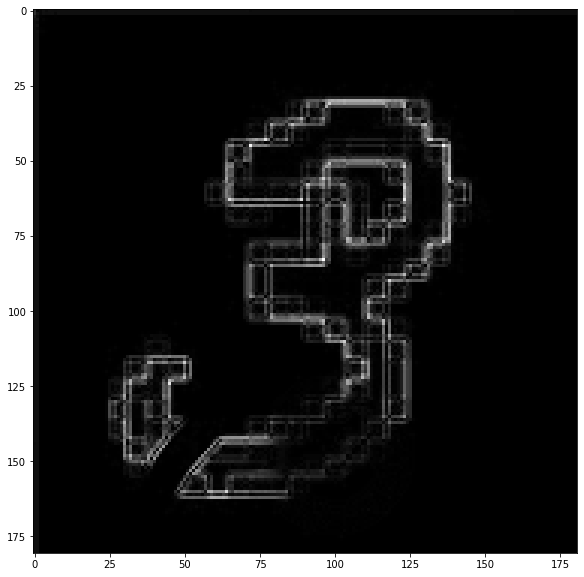

In [ ]:
kernel = np.array([
                        [ 0, 1, 0],
                        [ 1,-4, 1],
                        [ 0, 1, 0],
                                     ]) 

grad = signal.convolve2d(arr, kernel, mode='same', boundary='symm')
%matplotlib inline

print('GRADIENT MAGNITUDE - Feature map')

fig, aux = plt.subplots(figsize=(10, 10))
aux.imshow(np.absolute(grad), cmap='gray')


<a id="ref5"> </a>
<h2> Conclusión </h2>

Esta comprensión de cómo funcionan las convoluciones es la base de cómo funcionan las redes neuronales convolucionales. Después de este laboratorio, se supone que debe comprender los conceptos matemáticos subyacentes y cómo aplicarlos usando | Python (Numpy) y TensorFlow. El siguiente paso es extrapolar este conocimiento a las aplicaciones de Machine Learning.

<hr>

### Gracias por completar este laboratorio!

# Referencias

https://github.com/joanbruna/stat212b/blob/master/lec1.pdf  
http://deeplearning.stanford.edu/wiki/index.php/Feature_extraction_using_convolution  
http://homepages.inf.ed.ac.uk/rbf/HIPR2/fourier.htm  

In [ ]:
import numpy as np
a = np.array([[[ 64,  71,  65, 49,  47,  48],
               [ 68,  71,  64, 54,  52,  51],
               [ 65,  69,  66, 54,  50,  55]],
              
              [[ 21,  24,  23, 184, 170, 155],
               [ 18,  21,  26, 179, 166, 153],
               [ 27,  22,  21, 170, 159, 149]]])
a.shape

(2, 3, 6)

In [ ]:
import pickle

objectToSave = a
filename = "array_imagenes.array"
pickle.dump(objectToSave, open(filename,'wb'))

In [ ]:
loaded_object = pickle.load(open(filename, 'rb'))

In [ ]:
loaded_object

array([[[ 64,  71,  65,  49,  47,  48],
        [ 68,  71,  64,  54,  52,  51],
        [ 65,  69,  66,  54,  50,  55]],

       [[ 21,  24,  23, 184, 170, 155],
        [ 18,  21,  26, 179, 166, 153],
        [ 27,  22,  21, 170, 159, 149]]])